Name: Mukesh Aryal

Student No: V00977403

Assignment 02

Phys555

# Question No.: 03
Finding best K and p using GridSearch

The data that I am using for this exercise is the data I used previously for regression, i.e. Solar radiation dataset. 

# Motivation
Tuning the parameters of a model to get the best result out of it is an important task. It helps us to make better predictions and further gives us more insight about the nature of the data in question. Instead of tuning the hyparameter of the model using loops and recursions, it can easily be done using GridSearch. 

# GridSearch 
GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator


In [51]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pandas.plotting import scatter_matrix    
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sys
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

print('Done!')

Done!


# Input and Target data columns for Solar radiation
Input data contains Temperature, Pressure, Humidity, WindDirection(Degrees), Speed, Month, SunPerDayHours as the columns of the matrix respectively. 
Target data is the radiation values. 

In [52]:
X = np.load('Solar_data_input.npy') # Load the input
Y = np.load('Solar_data_target.npy') # Load the target

Column_name = {0: 'Temperature', 1: 'Pressure', 2:'Humidity',3:'Wind Direction',4:'Speed',5:'Month',6:'SunPerDayHours'}

print('Done!')

Done!


In [53]:
print(np.shape(X),np.shape(Y)) # Check dimesions of data

(32685, 7) (32685,)


In [54]:
Y = np.reshape(Y,(-1,1))
print(np.shape(X),np.shape(Y))

(32685, 7) (32685, 1)


Text(0.5, 0, 'Speed')

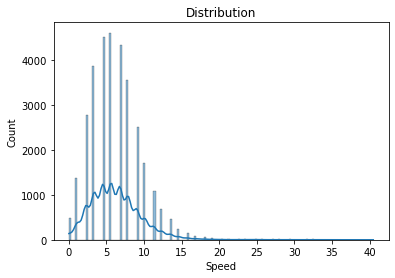

In [55]:
# Choose a column to see the distribution

n_column = 4

fig = sns.histplot(X[:,n_column],kde = 'True')
fig.set_title('Distribution')
fig.set_xlabel(Column_name[n_column])



Text(0.5, 0, 'Target')

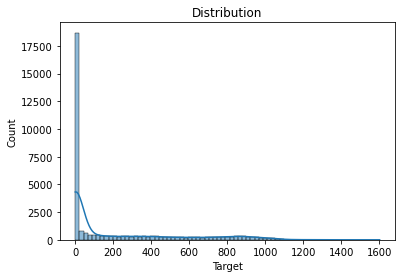

In [56]:
# target distribution
fig = sns.histplot(Y[:,0],kde = 'True')
fig.set_title('Distribution')
fig.set_xlabel('Target')

In [57]:
# Splitting the data into training and validation set
X_tr, X_va, Y_tr,Y_va = train_test_split(X,Y,test_size = 0.25)
print('training set == ', np.shape(X_tr),np.shape(Y_tr),', validation set ==',np.shape(X_va),np.shape(Y_va))

training set ==  (24513, 7) (24513, 1) , validation set == (8172, 7) (8172, 1)


In [58]:
# Standard Normalization

scaler_S = StandardScaler().fit(X_tr)
X_tr_Norm = scaler_S.transform(X_tr)

X_va_Norm = scaler_S.transform(X_va)
print('Done!')

Done!


Text(0.5, 0, 'Humidity')

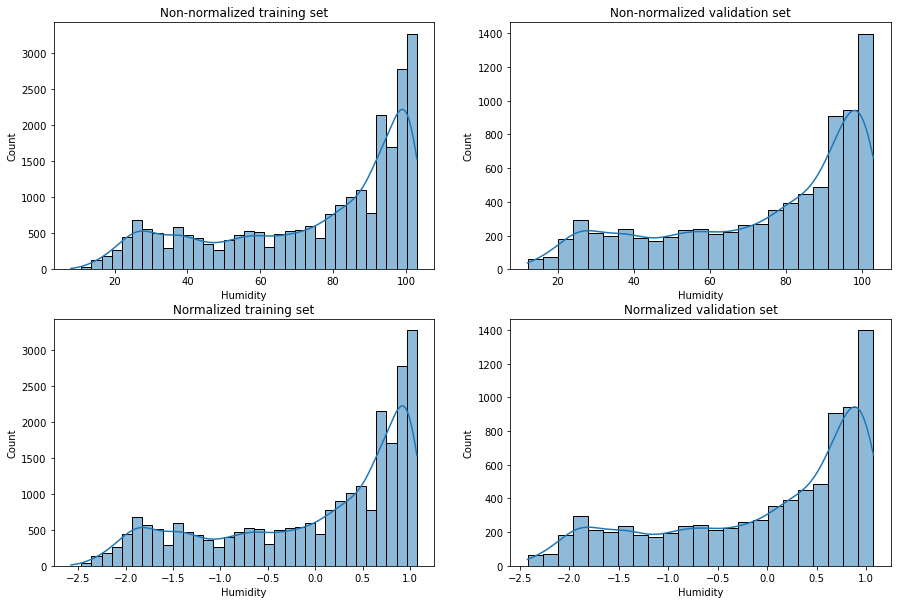

In [59]:
# Comparing th distribution from the normalized training and validation sets

n_column = 2

fig2 = plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = sns.histplot(X_tr[:,n_column],kde = 'True')
fig.set_title('Non-normalized training set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,2)
fig = sns.histplot(X_va[:,n_column],kde = 'True')
fig.set_title('Non-normalized validation set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,3)
fig = sns.histplot(X_tr_Norm[:,n_column],kde = 'True')
fig.set_title('Normalized training set')
fig.set_xlabel(Column_name[n_column])

plt.subplot(2,2,4)
fig = sns.histplot(X_va_Norm[:,n_column],kde = 'True')
fig.set_title('Normalized validation set')
fig.set_xlabel(Column_name[n_column])

In [60]:
print(np.shape(Y_va))

(8172, 1)


# Using Grid Search to find the best hyperparameters for KNN
The hyperparameters we are trying to tune here is n_neighbors or K-value and p-value or metric of KNN model. 

Initially larger gaps steps are taken to see how the model performs in a wider variety of parameter values. 

In [62]:
K_val = [1,5,20,50,100,500]
p_val = [1,5,20,50,100,500]
clf = GridSearchCV(KNeighborsRegressor(),{
    'n_neighbors' : K_val,
    'p' : p_val
}, cv = 5, return_train_score = False)

clf.fit(X_tr_Norm,Y_tr)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 20, 50, 100, 500],
                         'p': [1, 5, 20, 50, 100, 500]})

In [63]:
# using pandas dataframe to capture the result of grid search 
df = pd.DataFrame(clf.cv_results_)
df[['param_n_neighbors','param_p','mean_test_score']]

,param_n_neighbors,param_p,mean_test_score
0,1,1,0.656232
1,1,5,0.637515
2,1,20,0.631160
3,1,50,0.630093
4,1,100,0.628549
5,1,500,0.619428
6,5,1,0.769201
7,5,5,0.753248
8,5,20,0.748316
9,5,50,0.747906


# Visualizing result
The result is easier to visualize usin a heatmap since we are only trying to tune 2 parameters here. 

The best parameters appear to lie in the range of p-value 1-5 and K-value 5-20.

<AxesSubplot:xlabel='param_n_neighbors', ylabel='param_p'>

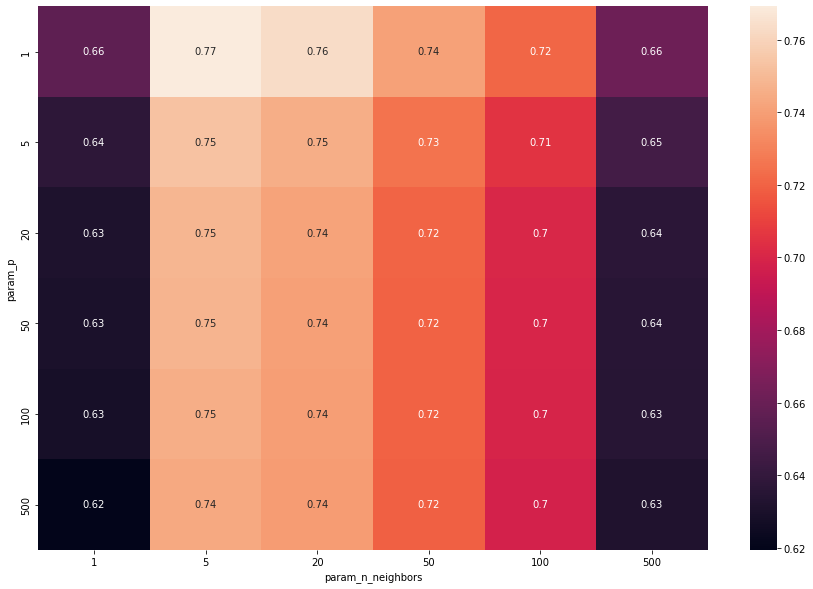

In [64]:
# using heatmap for better visualization
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),values = 'mean_test_score',index = 'param_p',columns = 'param_n_neighbors')
plt.figure(figsize=(15,10))
sns.heatmap(pvt,annot = True)

# Observation and further analysis
The highest mean test score value seems is obtained while using parameter p between 1 and 5 and with K value between 5 and 20. Increasing the resolution now to pick the final best values.

In [65]:
K_val = [5,10,15,20,25]
p_val = [1,2,3,4,5]
clf = GridSearchCV(KNeighborsRegressor(),{
    'n_neighbors' : K_val,
    'p' : p_val
}, cv = 5, return_train_score = False)

clf.fit(X_tr_Norm,Y_tr)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25],
                         'p': [1, 2, 3, 4, 5]})

<AxesSubplot:xlabel='param_n_neighbors', ylabel='param_p'>

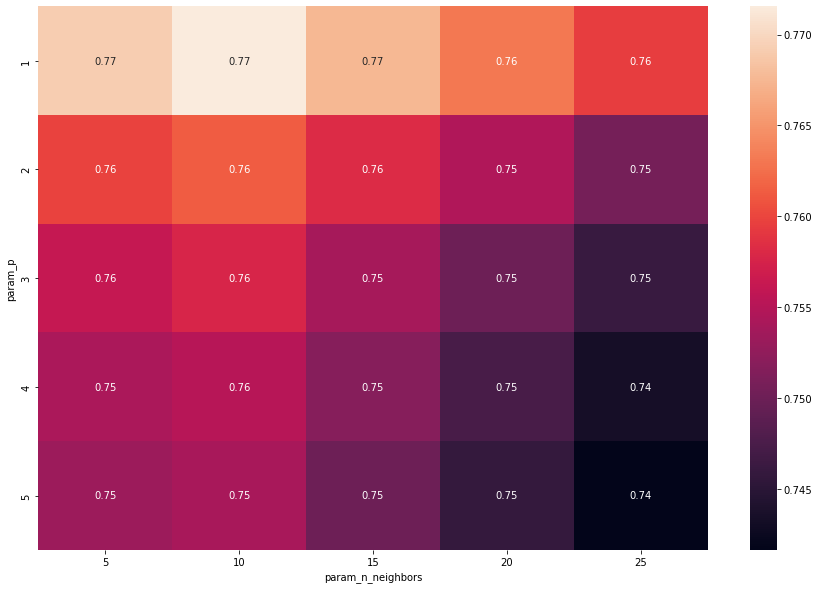

In [66]:
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),values = 'mean_test_score',index = 'param_p',columns = 'param_n_neighbors')
plt.figure(figsize=(15,10))
sns.heatmap(pvt,annot = True)

# Observation with higher resolution
The best result falls with p value 1 and 2, and n_neighbors between 5 and 15.
Increasing the resolution more

In [67]:
K_val = np.arange(5,15)
p_val = [1,2]
clf = GridSearchCV(KNeighborsRegressor(),{
    'n_neighbors' : K_val,
    'p' : p_val
}, cv = 5, return_train_score = False)

clf.fit(X_tr_Norm,Y_tr)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2]})

<AxesSubplot:xlabel='param_n_neighbors', ylabel='param_p'>

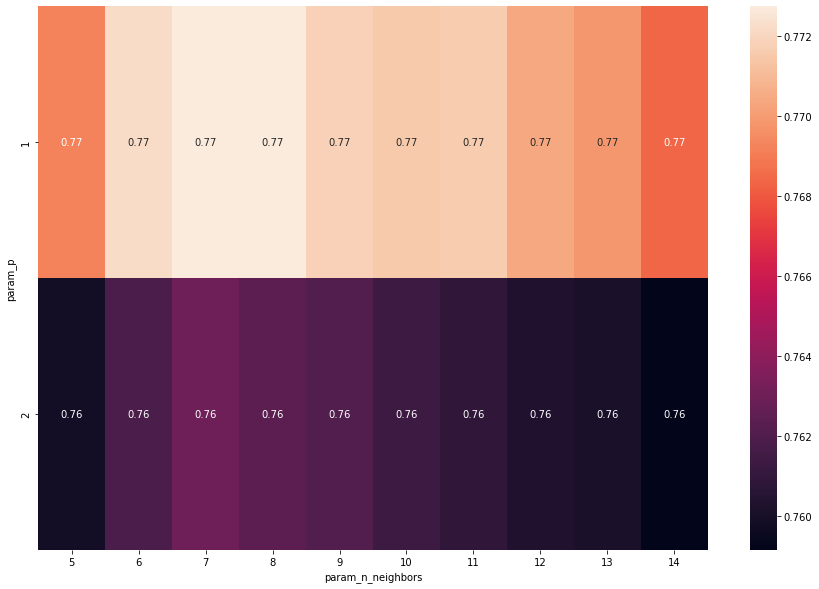

In [68]:
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),values = 'mean_test_score',index = 'param_p',columns = 'param_n_neighbors')
plt.figure(figsize=(15,10))
sns.heatmap(pvt,annot = True)

# Best hyperparameter
The final resolution reveals that the best hyperparameter for our KNN regressor is:
K-value = 8
p-value = 1

Note that previous result for best hyperparameter was K = 7 and p = 1. 
The result from both searches agree with each other.

In [69]:
Best_K = 8
Best_p = 1
print('Best K value is ',Best_K,' and best p value is ',Best_p) 

Best K value is  8  and best p value is  1


In [70]:
# Using the model with best K and p values 
max_rad_val = 1700
neigh_val = Best_K
p_val = Best_p

reg = clf.best_estimator_

# Normalized
reg.fit(X_tr_Norm, Y_tr) # normalized
Y_tr_pred_Norm = reg.predict(X_tr_Norm)
Y_va_pred_Norm = reg.predict(X_va_Norm)


Text(0.5, 1.0, 'Normalized')

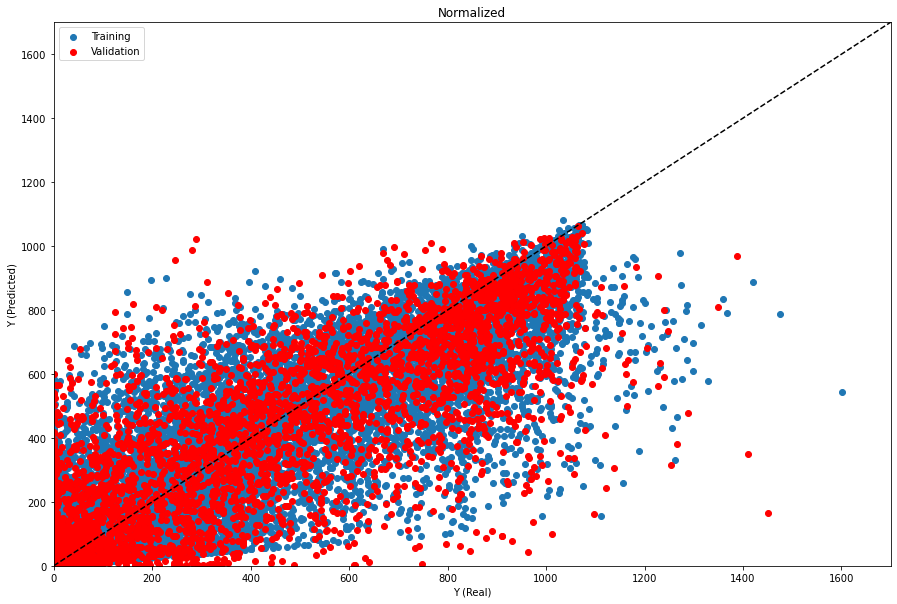

In [71]:
# plot
fig = plt.figure(figsize = (15,10))

plt.scatter(Y_tr,Y_tr_pred_Norm,label = 'Training',alpha = 1)
plt.scatter(Y_va,Y_va_pred_Norm,label = 'Validation',alpha = 1,color = 'r')
plt.xlabel('Y (Real)')
plt.ylabel('Y (Predicted)')
plt.xlim([0,max_rad_val])
plt.ylim([0,max_rad_val])
plt.plot([0,max_rad_val],[0,max_rad_val],'--k')
plt.legend()
plt.title('Normalized')

# Comparing predicted and actual values


Text(0.5, 1.0, 'Normalized')

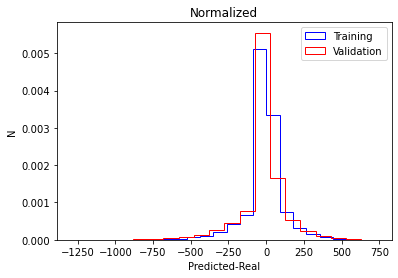

In [72]:
# Inspecting distribution of the difference between the predicted and actual values for the training set

diff_tr_Norm = Y_tr_pred_Norm - Y_tr;
diff_va_Norm = Y_va_pred_Norm - Y_va;

bin_val = 20;

plt.hist(diff_tr_Norm,bin_val,color='b',histtype = 'step',density=True,label = 'Training')
plt.hist(diff_va_Norm,bin_val,color='r',histtype = 'step',density=True,label = 'Validation')
plt.xlabel('Predicted-Real')
plt.ylabel('N')
plt.legend()
plt.title('Normalized')

# Inspecting systematic errors.

Text(0.5, 1.0, 'Normalized')

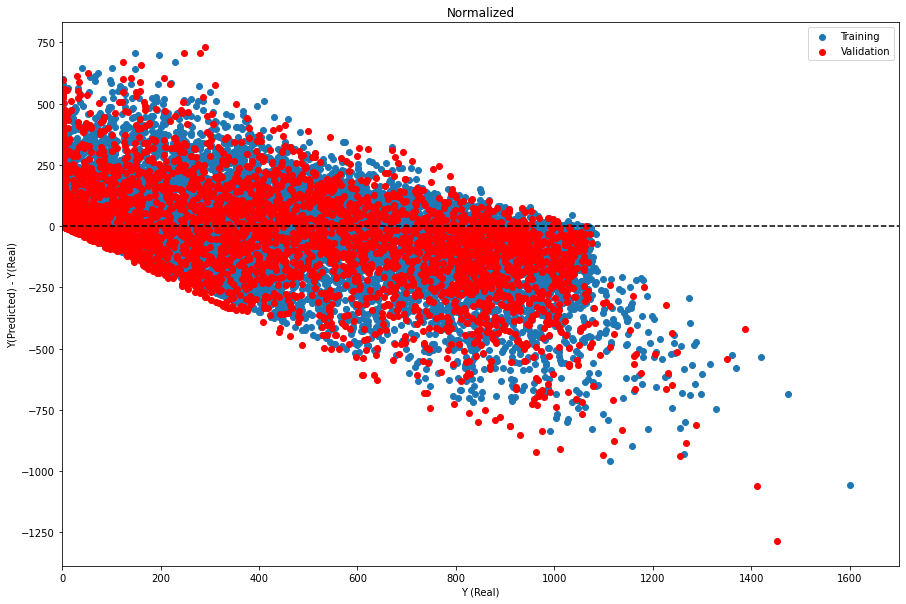

In [73]:
# Inspecting systematic errors
# plots 

fig = plt.figure(figsize = (15,10))

plt.scatter(Y_tr,diff_tr_Norm,label = 'Training',alpha = 1)
plt.scatter(Y_va,diff_va_Norm,label = 'Validation',alpha = 1,color = 'r')
plt.xlabel('Y (Real)')
plt.ylabel('Y(Predicted) - Y(Real)')
plt.xlim([0,max_rad_val])
plt.plot([0,max_rad_val],[0,0],'--k')
plt.legend()
plt.title('Normalized')

# Conclusion and Discussion
The final resolution reveals that the best hyperparameter for our KNN regressor is:
K-value = 8
p-value = 1

Implementing grid search is very easy and it correctly predicts the best parameters for the model. Cross validation further ensures that we are not overfitting and underfitting the model. Note that previous result for best hyperparameter was K = 7 and p = 1. 
The result from both searches agree with each other.